In [2]:
# IRF

# https://python-advanced.quantecon.org/irfs_in_hall_model.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import LQ
from quantecon import DLE

In [5]:
γ_1 = 0.1
γ = np.array([[γ_1], [0]])
ϕ_c = np.array([[1], [0]])
ϕ_g = np.array([[0], [1]])
ϕ_1 = 1e-5
ϕ_i = np.array([[1], [-ϕ_1]])
δ_k = np.array([[.95]])
θ_k = np.array([[1]])
β = np.array([[1 / 1.05]])
l_λ = np.array([[0]])
π_h = np.array([[1]])
δ_h = np.array([[.9]])
θ_h = np.array([[1]])
a22 = np.array([[1,   0,   0],
                [0, 0.8,   0],
                [0,   0, 0.5]])
c2 = np.array([[0, 0],
               [1, 0],
               [0, 1]])
ud = np.array([[5, 1, 0],
               [0, 0, 0]])
ub = np.array([[30, 0, 0]])
x0 = np.array([[5], [150], [1], [0], [0]])

info1 = (a22, c2, ub, ud)
tech1 = (ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k)
pref1 = (β, l_λ, π_h, δ_h, θ_h)

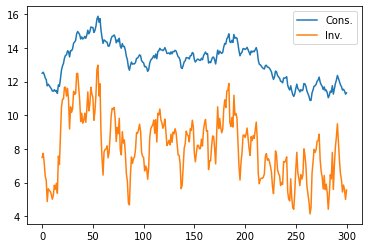

In [6]:
econ1 = DLE(info1, tech1, pref1)
econ1.compute_sequence(x0, ts_length=300)

# This is the right panel of Fig 5.7.1 from p.105 of HS2013
plt.plot(econ1.c[0], label='Cons.')
plt.plot(econ1.i[0], label='Inv.')
plt.legend()
plt.show()

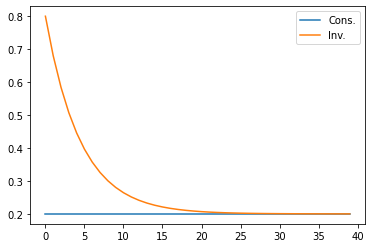

In [7]:
econ1.irf(ts_length=40, shock=None)
# This is the left panel of Fig 5.7.1 from p.105 of HS2013
plt.plot(econ1.c_irf, label='Cons.')
plt.plot(econ1.i_irf, label='Inv.')
plt.legend()
plt.show()

In [9]:
# Brief aside: here is some optimization in python

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

In [11]:
from scipy.optimize import minimize, rosen, rosen_der

In [13]:
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='Nelder-Mead', tol=1e-6)
res.x


array([1.00000002, 1.00000002, 1.00000007, 1.00000015, 1.00000028])

In [ ]:
# I need to do this with the argmin function that gets w for distanced based weighting